In [1]:
import os
import numpy as np
import pandas as pd
import random
import gc

# for Plotting
import matplotlib.pyplot as plt

# for image processing
import PIL.Image as Image
import cv2;


In [2]:
# define constants
DATASET_DIR = '/Users/ravisher/Development/FatehLabs/AIDD-Project/Dataset/car-damage-dataset'
DAMAGE_SET = 'set1'
SEVERITY_SET = 'set2-severity'
PARTS_SET = 'set3-parts'

DAMAGE_CLASSES = ['damage', 'whole']
SEVERITY_CLASSES = ['minor', 'moderate' 'major']
PARTS_CLASSES = ['front', 'rear', 'side']

TRAINING = 'training'
VALIDATION = 'validation'

# Image dimensions
img_width = 200
img_height = 200
channel = 3

In [3]:
# Prepare data for the given categories and model_type
def getDataByCategories(path, subfolder, categories, model_type):
    """
        Populate the data for given categories.
        Based on the category, the label will be updated.
    """
    dataset = []
    for category in categories:
        dataset_path = os.path.join(path, subfolder, model_type, category)
        for img in os.listdir(dataset_path):
            img_path = os.path.join(dataset_path, img)
            pair = (category, img_path)
            dataset.append(pair)
    return dataset

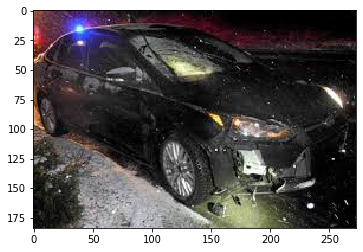

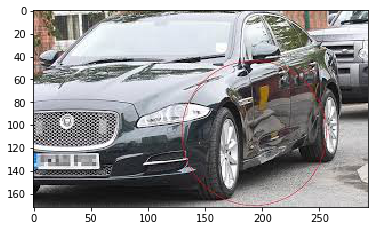

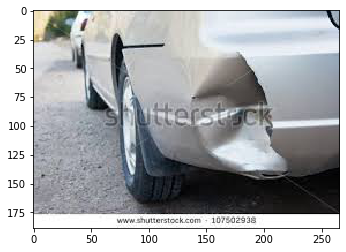

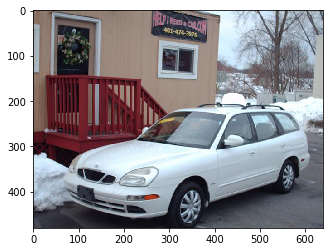

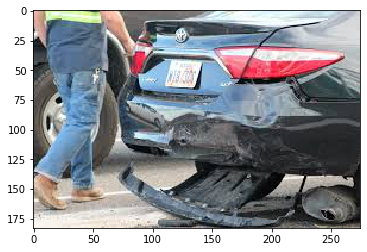

In [4]:
# Training Data for Damage classes
train_data = getDataByCategories(DATASET_DIR, DAMAGE_SET, DAMAGE_CLASSES, TRAINING)
random.shuffle(train_data)
for cat, img in train_data[:5]:    
    with Image.open(img) as image:
        implot = plt.imshow(image)
        plt.show()

In [5]:
# Process the images
def prepareDataForEvaluation(data):
    """
    In this function, we will prepare the data for model training, validation and testing.
    Update the images to be of same dimension.
    Return two arrays X and y which contains the images and labels respectively. In case of test
    data set, y will be []
    """
    X = []
    y = []
    for (cat, img) in data:
        X.append(cv2.resize(cv2.imread(img, cv2.IMREAD_COLOR), (img_width, img_height), interpolation=cv2.INTER_CUBIC))
        if cat:
            y.append(DAMAGE_CLASSES.index(cat))
    
    return X, y

In [6]:
X, y = prepareDataForEvaluation(train_data)

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 

image shape: (200, 200, 3)
Count:  1840


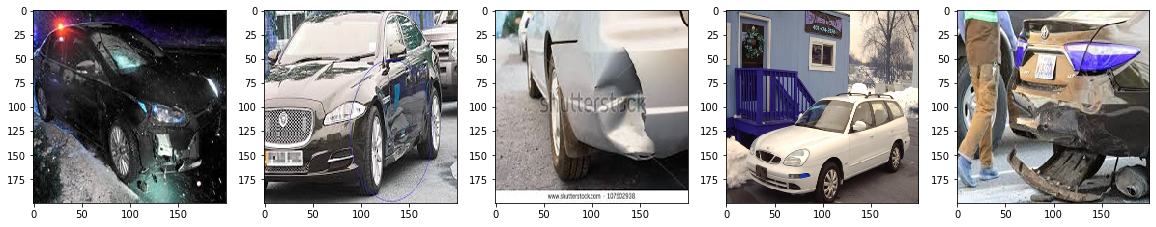

In [7]:
# Verify the processed data set
#1. Verify image shape
print('image shape: {}'.format(X[0].shape))

#2.Plot the images
plt.figure(figsize=(20, 10))
columns = 5
for i in range(columns):
    plt.subplot(5/columns + 1, columns, i+1)
    plt.imshow(X[i])
    
#3. count images
print('Count: ', len(X))

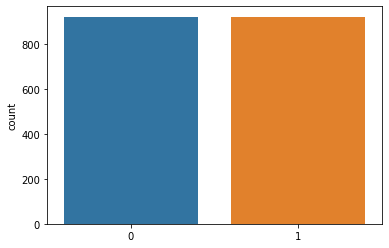

In [8]:
# Plot the distribution of the labels for the dataset
import seaborn as sns
temp = np.array(y)
sns.countplot(temp)
del temp

In [9]:
# Convert the list data into numpy array for processing
X = np.array(X)
y = np.array(y)
print('X shape: ', X.shape)
print('y shape: ', y.shape)


X shape:  (1840, 200, 200, 3)
y shape:  (1840,)


In [10]:
# Train and validation split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.20, random_state=2)

print('Shape of train image {}'.format(X_train.shape))
print('Shape of train label {}'.format(y_train.shape))
print('Shape of validation image {}'.format(X_val.shape))
print('Shape of validation label {}'.format(y_val.shape))

Shape of train image (1472, 200, 200, 3)
Shape of train label (1472,)
Shape of validation image (368, 200, 200, 3)
Shape of validation label (368,)


In [11]:
# !pip install keras
from keras import layers
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([(

In [12]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W1015 19:36:17.007233 4584990144 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [13]:
# See model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)      

In [14]:
model.compile(optimizer=optimizers.RMSprop(lr=.001), loss='binary_crossentropy', metrics=['acc'])

W1015 19:36:25.590244 4584990144 deprecation.py:323] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
# define the generators
train_datagen = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
# create the generators
batch_size = 16
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [17]:
# clear any unused data before fitting the model
del X
del y
gc.collect()

60

In [18]:
history = model.fit_generator(train_generator,
                   steps_per_epoch=len(X_train) // batch_size,
                   epochs=20,
                   validation_data=val_generator,
                   validation_steps= len(X_val) // batch_size)

W1015 19:36:56.581204 4584990144 deprecation_wrapper.py:119] From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/20
92/92 [==============================] - 98s 1s/step - loss: 0.7864 - acc: 0.5401 - val_loss: 0.6666 - val_acc: 0.7011
Epoch 2/20
92/92 [==============================] - 167s 2s/step - loss: 0.6713 - acc: 0.5958 - val_loss: 0.7617 - val_acc: 0.6766
Epoch 3/20
92/92 [==============================] - 92s 1s/step - loss: 0.6535 - acc: 0.6413 - val_loss: 0.6563 - val_acc: 0.6386
Epoch 4/20
92/92 [==============================] - 91s 984ms/step - loss: 0.6411 - acc: 0.6474 - val_loss: 0.5096 - val_acc: 0.7201
Epoch 5/20
92/92 [==============================] - 92s 1s/step - loss: 0.6380 - acc: 0.6610 - val_loss: 0.4363 - val_acc: 0.6739
Epoch 6/20
92/92 [==============================] - 96s 1s/step - loss: 0.6141 - acc: 0.6760 - val_loss: 0.9475 - val_acc: 0.6196
Epoch 7/20
92/92 [==============================] - 107s 1s/step - loss: 0.5956 - acc: 0.6814 - val_loss: 0.8695 - val_acc: 0.7310
Epoch 8/20
92/92 [==============================] - 97s 1s/step - loss: 0.5913 - acc:

In [19]:
# save model
model.save_weights('car-damage-classifier.h5')
model.save('car-damage.h5')

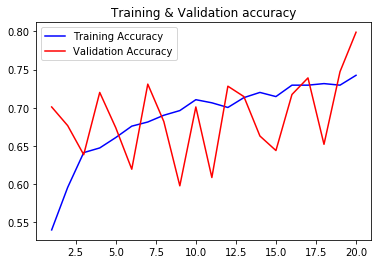

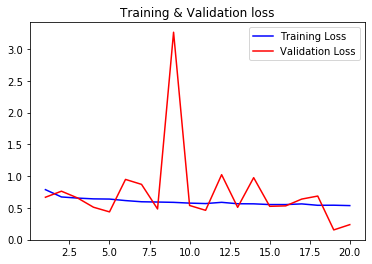

In [20]:
# plot train and val curve
acc = history.history['acc']
loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Training and Validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training & Validation accuracy')
plt.legend()

plt.figure()

# Training and Validation Loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training & Validation loss')
plt.legend()

plt.show()

In [21]:
test_dir = '/Users/ravisher/Development/FatehLabs/AIDD-Project/test-set-cars'
test_set = [(None, os.path.join(test_dir, i)) for i in os.listdir(test_dir)]
X_test, y_test = prepareDataForEvaluation(test_set)
print(X_test)

[array([[[ 14, 100, 154],
        [  1,  72, 117],
        [  4,  59,  88],
        ...,
        [ 17,  38,  27],
        [ 40,  66,  53],
        [ 42,  72,  59]],

       [[ 10,  96, 149],
        [  0,  81, 124],
        [ 14,  93, 122],
        ...,
        [ 15,  37,  25],
        [ 34,  59,  47],
        [ 35,  65,  52]],

       [[  7,  93, 141],
        [  3,  90, 131],
        [ 44, 129, 158],
        ...,
        [ 15,  36,  24],
        [ 32,  57,  45],
        [ 33,  62,  49]],

       ...,

       [[153, 160, 169],
        [152, 159, 168],
        [153, 160, 169],
        ...,
        [163, 169, 180],
        [163, 170, 180],
        [161, 170, 180]],

       [[152, 159, 168],
        [152, 159, 168],
        [153, 160, 169],
        ...,
        [162, 168, 179],
        [163, 170, 181],
        [161, 170, 180]],

       [[152, 159, 168],
        [152, 159, 168],
        [152, 159, 168],
        ...,
        [162, 168, 179],
        [164, 170, 181],
        [161, 170, 180]

In [22]:
print(y_test)

[]


In [23]:
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1/255)

[[0.48575827]]
[[0.14474101]]
[[0.9698046]]
[[0.46645778]]
[[0.14474101]]
[[0.46645778]]
[[0.9698046]]
[[0.48575827]]
[[0.14474101]]
[[0.48575827]]


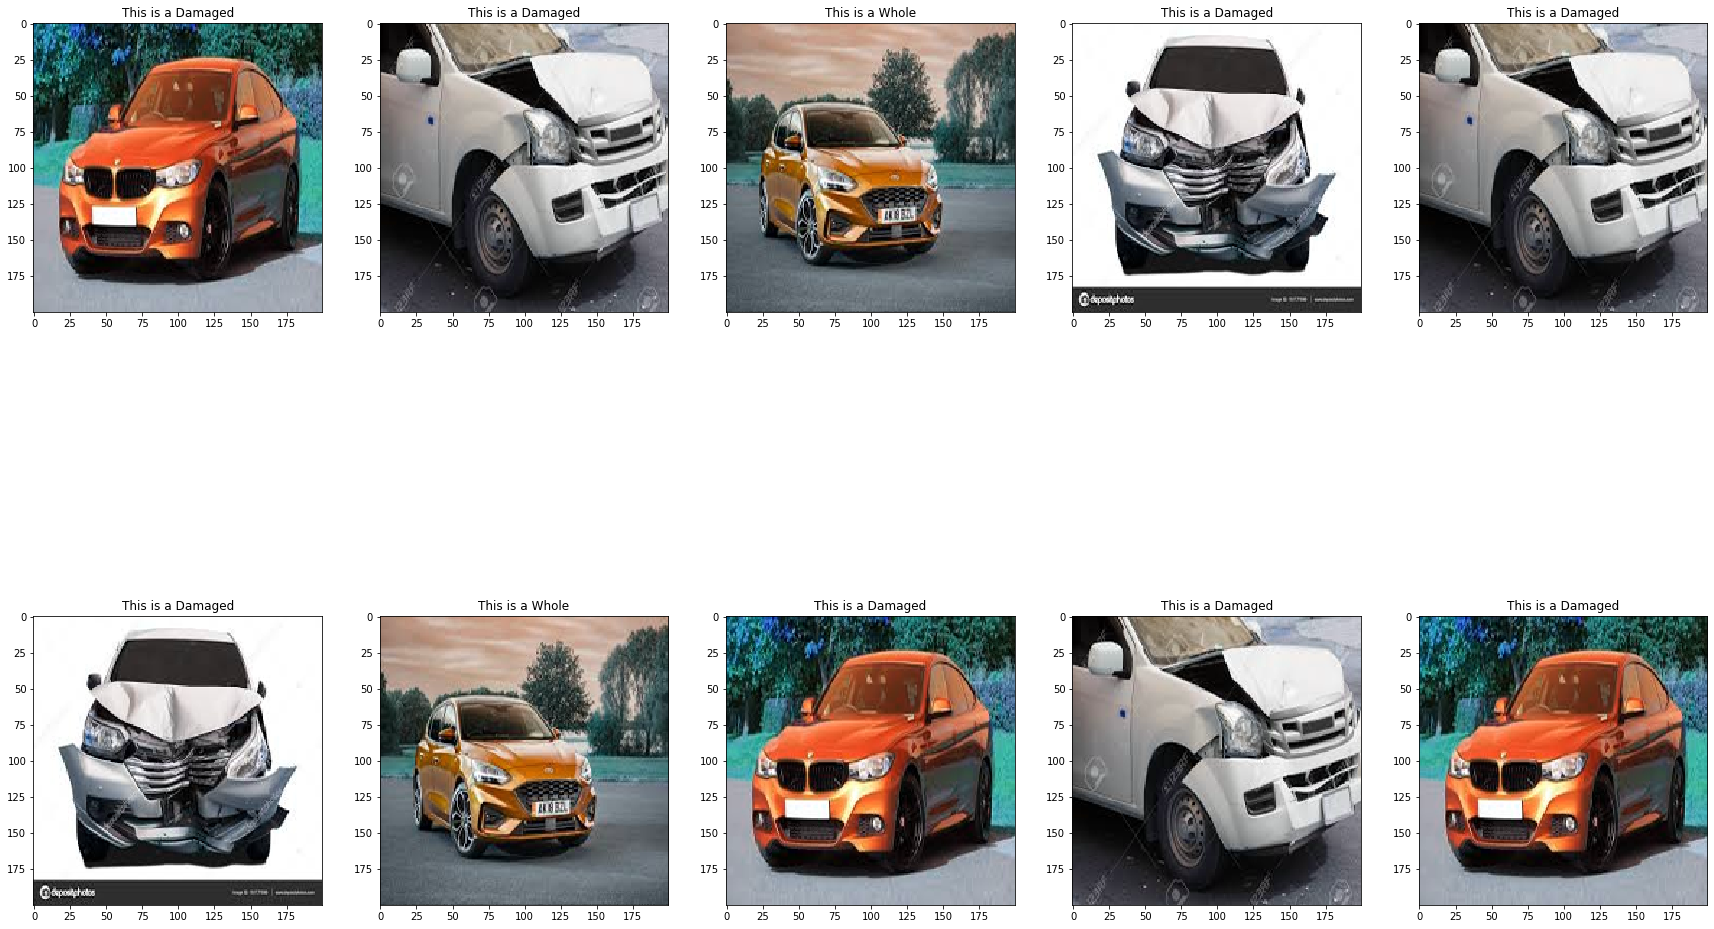

In [24]:
i = 0
text_labels = []
plt.figure(figsize=(30, 20))

for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    print(pred)
    if pred < 0.5:
        text_labels.append('Damaged')
    else:
        text_labels.append('Whole')

    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break;
plt.show()
